## Assignment 10

#### Name : Raswanth S.R
#### RollNum : CB.EN.U4CSE19648

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

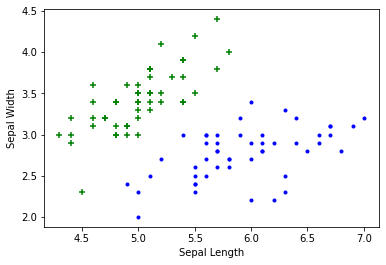

In [9]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

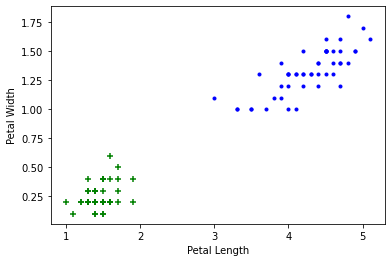

In [10]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [11]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [13]:
model.score(X_test, y_test)

0.9666666666666667

In [14]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [15]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [16]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [17]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

In [18]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
model_linear_kernal.score(X_test, y_test)

1.0

In [20]:
y_pred = model_linear_kernal.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[13  0  0]
 [ 0  4  0]
 [ 0  0 13]]


In [22]:
from sklearn import metrics
# accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
# precision scoreprint("precision:", metrics.precision_score(y_test,y_pred, average='macro'))
# recall score
print("recall" , metrics.recall_score(y_test,y_pred, average='macro'))
print(metrics.classification_report(y_test, y_pred))

acuracy: 1.0
recall 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



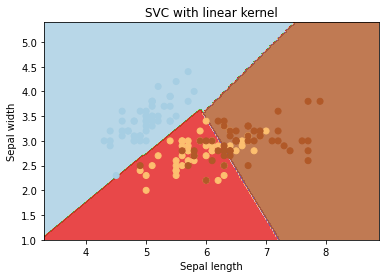

In [23]:
from matplotlib.colors import ListedColormap
X = iris.data[:, :2]
y = iris.target
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='linear', C=1).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

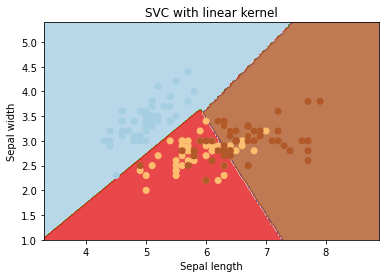

In [24]:
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='rbf', C=100, gamma=0.01).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

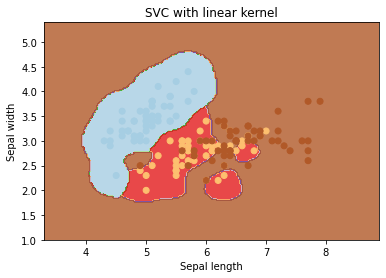

In [26]:
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='rbf', C=10, gamma=10).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':(1, 10, 100, 1000), 'gamma':(0.1, 0.01, 0.001, 0.0001)}
grid_search = GridSearchCV(svc, param_grid, cv=10, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.917, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.833, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.917, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.917, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=0.833, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.917, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.833, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.917, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.417, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.917, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=1.000, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.833, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.6s finished


GridSearchCV(cv=10, estimator=SVC(C=10, gamma=10),
             param_grid={'C': (1, 10, 100, 1000),
                         'gamma': (0.1, 0.01, 0.001, 0.0001)},
             verbose=10)

In [28]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01}